# SENTIMENT ANALYSIS MODEL :


### Problem Statement :
##### Develop a senitemt analysis model to classify reviews as positive or negative.
##### Preprocess the review test using techniques such as lower casing,removing stop words and lematization.
##### Use the trained model accurately predict the sentiment of new,unseen reviews.

## Import the libraries and Do the preprocessing:

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Reviews.csv')

In [3]:
print(data)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [4]:
# we can review the top 10 rows
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [5]:
# we can review the bottom 10 rows
data.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
# checking the null values
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [8]:
 #checking the duplicate values
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

## Exploratory Data Analysis :

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [11]:
from wordcloud import WordCloud

In [12]:
combined_text=" ".join(data['Review'])

In [13]:
wordcloud=WordCloud(width=800,height=400,background_color='white').generate(combined_text)

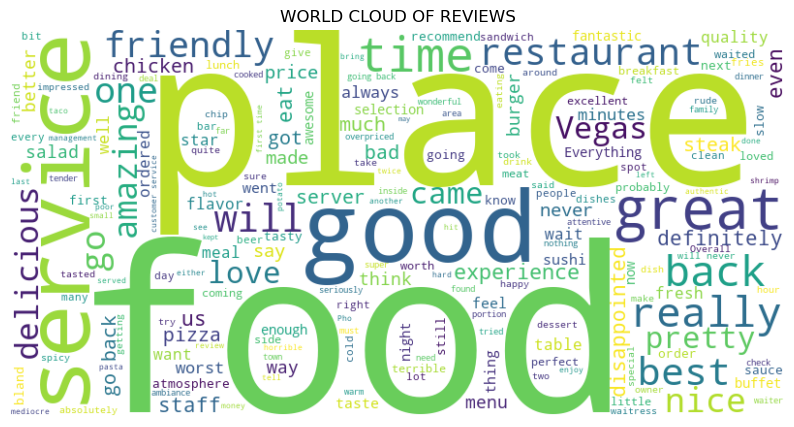

In [14]:
#plot the world cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("world cloud of reviews".upper())
plt.show()

In [15]:
from collections import Counter

In [16]:
#flatten reviews into single list of words
targeted_words= ['good','great','amazing','bad','not bad']
all_words = " ".join(data['Review']).lower().split()
word_counts=Counter(all_words)
target_word_count= {word: word_counts[word] for word in targeted_words}

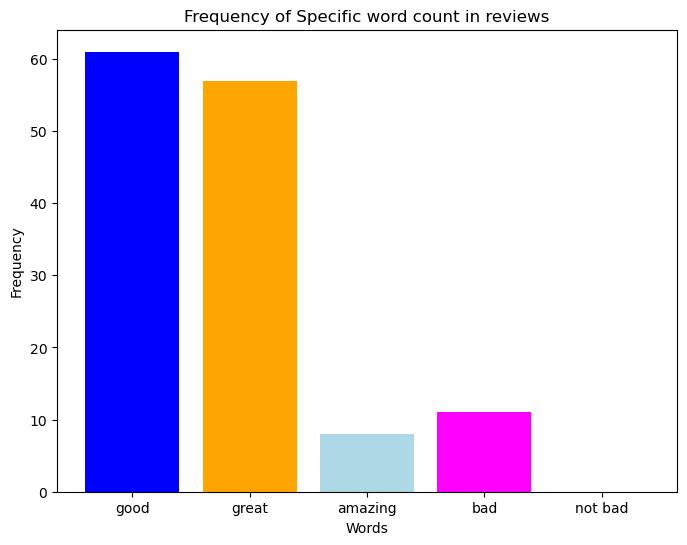

In [17]:
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(),target_word_count.values(),color=['blue','orange','lightblue','magenta'])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Frequency of Specific word count in reviews")
plt.show()


### Text Preprocessing :

In [18]:
#converting into lowercase:
lowercased_text=data['Review'].str.lower()
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [19]:
#tokenization
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Neelam
[nltk_data]     Meghana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
data['Tokens']=data['Review'].apply(word_tokenize)
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [21]:
#removing stop words:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Neelam
[nltk_data]     Meghana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
stop_words= set(stopwords.words('english'))


In [23]:
data['Tokens']=data['Review'].apply(lambda x:[word for word in word_tokenize(x) if word not in stop_words])

In [24]:
print(data['Tokens'])

0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 1000, dtype: object


## Stemming:

In [25]:
#stemming is the process of reducing words to its base form
from nltk.stem import PorterStemmer

In [26]:
stemmer=PorterStemmer()

In [27]:
data['stemmed']=data['Review'].apply(lambda x:" ".join(stemmer.stem(word) for word in word_tokenize(x)))

In [28]:
print(data['stemmed'])

0                               wow ... love thi place .
1                                    crust is not good .
2               not tasti and the textur wa just nasti .
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                             appetit instantli gone .
997      overal i wa not impress and would not go back .
998    the whole experi wa underwhelm , and i think w...
999    then , as if i had n't wast enough of my life ...
Name: stemmed, Length: 1000, dtype: object


In [29]:
data['stemmed'].value_counts()

stemmed
# name ?                                                                                                                               4
the food wa terribl .                                                                                                                  2
i would not recommend thi place .                                                                                                      2
i love thi place .                                                                                                                     2
i wo n't be back .                                                                                                                     2
                                                                                                                                      ..
omg , the food wa delicioso !                                                                                                          1
there is noth authent about thi p

In [30]:
# word lemmatization 
from nltk.stem import  WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Neelam
[nltk_data]     Meghana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
lemmatizer=WordNetLemmatizer()

In [32]:
data['lemmatized']=data['Review'].apply(lambda x:" ".join([lemmatizer.lemmatize(word,pos=wordnet.VERB) for word in word_tokenize(x)]))

In [33]:
print(data['lemmatized'])

0                             Wow ... Loved this place .
1                                    Crust be not good .
2              Not tasty and the texture be just nasty .
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                              Appetite instantly go .
997     Overall I be not impress and would not go back .
998    The whole experience be underwhelming , and I ...
999    Then , as if I have n't waste enough of my lif...
Name: lemmatized, Length: 1000, dtype: object


In [34]:
#removing numbers
import re
data['No_Numbers']=data["Review"].apply(lambda x: re.sub(r'\d+','',x))

In [35]:
print(data['No_Numbers'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [36]:
data['cleaned_text']=data['Review'].apply(lambda x: re.sub(r'[^A-Za-z)-9\s]',' ',x))

In [37]:
print(data['cleaned_text'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn t wasted enough of my life ...
Name: cleaned_text, Length: 1000, dtype: object


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        1000 non-null   object
 1   Liked         1000 non-null   int64 
 2   Tokens        1000 non-null   object
 3   stemmed       1000 non-null   object
 4   lemmatized    1000 non-null   object
 5   No_Numbers    1000 non-null   object
 6   cleaned_text  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [39]:
data

,Review,Liked,Tokens,stemmed,lemmatized,No_Numbers,cleaned_text
0,Wow... Loved this place.,1,"[Wow, ..., Loved, place, .]",wow ... love thi place .,Wow ... Loved this place .,Wow... Loved this place.,Wow... Loved this place.
1,Crust is not good.,0,"[Crust, good, .]",crust is not good .,Crust be not good .,Crust is not good.,Crust is not good.
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, texture, nasty, .]",not tasti and the textur wa just nasti .,Not tasty and the texture be just nasty .,Not tasty and the texture was just nasty.,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...,1,"[Stopped, late, May, bank, holiday, Rick, Stev...",stop by dure the late may bank holiday off ric...,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,"[The, selection, menu, great, prices, .]",the select on the menu wa great and so were th...,The selection on the menu be great and so be t...,The selection on the menu was great and so wer...,The selection on the menu was great and so wer...
...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,"[I, think, food, flavor, texture, lacking, .]",i think food should have flavor and textur and...,I think food should have flavor and texture an...,I think food should have flavor and texture an...,I think food should have flavor and texture an...
996,Appetite instantly gone.,0,"[Appetite, instantly, gone, .]",appetit instantli gone .,Appetite instantly go .,Appetite instantly gone.,Appetite instantly gone.
997,Overall I was not impressed and would not go b...,0,"[Overall, I, impressed, would, go, back, .]",overal i wa not impress and would not go back .,Overall I be not impress and would not go back .,Overall I was not impressed and would not go b...,Overall I was not impressed and would not go b...
998,"The whole experience was underwhelming, and I ...",0,"[The, whole, experience, underwhelming, ,, I, ...","the whole experi wa underwhelm , and i think w...","The whole experience be underwhelming , and I ...","The whole experience was underwhelming, and I ...","The whole experience was underwhelming, and I ..."


In [41]:
data

,Review,Liked,Tokens,stemmed,lemmatized,No_Numbers,cleaned_text
0,Wow... Loved this place.,1,"[Wow, ..., Loved, place, .]",wow ... love thi place .,Wow ... Loved this place .,Wow... Loved this place.,Wow... Loved this place.
1,Crust is not good.,0,"[Crust, good, .]",crust is not good .,Crust be not good .,Crust is not good.,Crust is not good.
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, texture, nasty, .]",not tasti and the textur wa just nasti .,Not tasty and the texture be just nasty .,Not tasty and the texture was just nasty.,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...,1,"[Stopped, late, May, bank, holiday, Rick, Stev...",stop by dure the late may bank holiday off ric...,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,"[The, selection, menu, great, prices, .]",the select on the menu wa great and so were th...,The selection on the menu be great and so be t...,The selection on the menu was great and so wer...,The selection on the menu was great and so wer...
...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,"[I, think, food, flavor, texture, lacking, .]",i think food should have flavor and textur and...,I think food should have flavor and texture an...,I think food should have flavor and texture an...,I think food should have flavor and texture an...
996,Appetite instantly gone.,0,"[Appetite, instantly, gone, .]",appetit instantli gone .,Appetite instantly go .,Appetite instantly gone.,Appetite instantly gone.
997,Overall I was not impressed and would not go b...,0,"[Overall, I, impressed, would, go, back, .]",overal i wa not impress and would not go back .,Overall I be not impress and would not go back .,Overall I was not impressed and would not go b...,Overall I was not impressed and would not go b...
998,"The whole experience was underwhelming, and I ...",0,"[The, whole, experience, underwhelming, ,, I, ...","the whole experi wa underwhelm , and i think w...","The whole experience be underwhelming , and I ...","The whole experience was underwhelming, and I ...","The whole experience was underwhelming, and I ..."


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        1000 non-null   object
 1   Liked         1000 non-null   int64 
 2   Tokens        1000 non-null   object
 3   stemmed       1000 non-null   object
 4   lemmatized    1000 non-null   object
 5   No_Numbers    1000 non-null   object
 6   cleaned_text  1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [43]:
pip install contractions


Note: you may need to restart the kernel to use updated packages.


In [44]:
#normalization
import contractions
data['Expanded']=data['Review'].apply(contractions.fix)
print(data['Expanded'])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I had not wasted enough of my life...
Name: Expanded, Length: 1000, dtype: object


In [45]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [47]:
from bs4 import BeautifulSoup

In [48]:
data['cleaned']=data['Review'].apply(lambda x:BeautifulSoup(x,"html.parser").get_text())

C:\Users\Neelam Meghana\AppData\Local\Temp\ipykernel_744\102395807.py:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  data['cleaned']=data['Review'].apply(lambda x:BeautifulSoup(x,"html.parser").get_text())


In [49]:
print(data["cleaned"])

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [51]:
#TF-IDf vectorizer:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x= vectorizer.fit_transform(data['Review'])

In [52]:
print(x.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [53]:
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
# building machine learning(naive bayes) model.v
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report


In [58]:
vectorizer = TfidfVectorizer()
x=vectorizer.fit_transform(data['Review'])
y=data['Liked']

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
print(x_train)

  (0, 1527)	0.578582388550776
  (0, 1516)	0.5587881819736206
  (0, 2005)	0.45560954528848707
  (0, 1938)	0.20794801889277578
  (0, 1778)	0.3196494189359375
  (1, 711)	0.4193390530637025
  (1, 622)	0.4193390530637025
  (1, 1180)	0.3554925882290983
  (1, 613)	0.32026666852400937
  (1, 1471)	0.272554926639921
  (1, 62)	0.5164170315313602
  (1, 263)	0.27998403419950374
  (2, 1057)	0.5102287539842273
  (2, 1962)	0.48790050997574835
  (2, 699)	0.3031291394604372
  (2, 1618)	0.5102287539842273
  (2, 1571)	0.3198299691276987
  (2, 1938)	0.21704341786509082
  (3, 1723)	0.4538927163856403
  (3, 1852)	0.42838721919777234
  (3, 719)	0.30305480231081033
  (3, 1791)	0.3192733609259723
  (3, 821)	0.37508854376741335
  (3, 590)	0.33614831815132157
  (3, 1471)	0.29501353406759745
  :	:
  (797, 1796)	0.2155139089210878
  (798, 649)	0.34296597014320795
  (798, 787)	0.34296597014320795
  (798, 17)	0.34296597014320795
  (798, 406)	0.32369375609078
  (798, 18)	0.34296597014320795
  (798, 122)	0.342965970143

In [61]:
print(y_train)

29     0
535    1
695    0
557    0
836    1
      ..
106    1
270    1
860    1
435    0
102    1
Name: Liked, Length: 800, dtype: int64


In [62]:
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [67]:
y_pred=model.predict(x_test)

In [68]:
acc=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [82]:
print("accuracy :",acc*100)
print(report)

accuracy : 80.0
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



In [79]:
def pred_sentiment(new_review):
    clean_review=preprocess_text(new_review)
    x_new=vectorizer.fit_transform([clean_review])
    return model.predict(x_new[0])

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import re

# Sample sentiment analysis model and vectorizer
vectorizer = CountVectorizer()
model = LogisticRegression()

# Define the preprocessing function
def preprocess_text(text):
    # Remove special characters and convert to lowercase
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    return cleaned_text

In [81]:

new=input("enter a review")
for r in new:
    s=pred_sentiment(r)
    sen='positive' if sentiment ==1 else 'Negative'
    print(sen)

enter a review the food is awesome


ValueError: empty vocabulary; perhaps the documents only contain stop words